# Redes Neuronales Introducción

In [1]:
import pandas as pd
from IPython import display
import numpy as np

## Se carga en memoria un cuaderno con utilidades de presentación

In [2]:
run 05.0_Redes_Neuronales_Utilidades.ipynb

<Figure size 640x480 with 0 Axes>

load done!


## Neurona de McCulloch y Pitts

{cite:p}`McCulloch_Pitts_1943` propusieron el primer modelo de neurona artificial denominado __TLU__ (Threshold Logic Unit) o LTU (Linear Threshold Unit), unidad de umbral lineal. A esta neurona artificial también se le denomina __Perceptrón__.

El modelo parte de $n$ entradas $(x_1, x_2, ..., x_j, ..., x_n)$ a la que se aplica una ponderación lineal más un umbral (que suele denominarse sesgo o bias, $b$):

$$z=b+\displaystyle\sum_{i=1}^n w_{i}x_i$$

A la que se aplica una función de activación no lineal, que en el modelo de McCulloch y Pitts es una función escalonada del tipo 

$$a=f(z) \left \{ \begin{array}{c} 1 &  z \ge 0 \\ 0 & z <0 \end{array} \right .  $$

Resultando un modelo con salida digital o binaria. Las entradas $(x_1, x_2, ..., x_j, ..., x_n)$  equivalen a las dendritas, el parámetro $b$ se denomina umbral o bias y la salida  $a$ es el axón. Durante el entrenamiento se compara $a$ con los valores reales que se encuentran en $y$ 

<img src="images/McCulloch-Pitts.png" width="500px">

### Significado y entrenamiento

El modelo puede utilizarse como clasificador y es un dispositivo entrenable. En su definición más simple con dos neuronas de entrada resulta

$$a= \left \{ \begin{array}{c} 1 &  si & b + w_1x_1 + w_2x_2 \ge 0 \\ 0 & si & b + w_1x_1 + w_2x_2 \lt 0 \end{array} \right .  $$

siendo $b + w_1 x_1+w_2 x_2=0 $  una recta que define la región de decisión. Representa un discriminador líneal y está limitado a clasificar conjuntos de datos linealmente separables. 

El entrenamiento para ajustar los pesos se basa en la __regla de Hebb__: 

 $$ w_i (t+1) = w_i (t)+ \eta  \displaystyle\sum_{r=1}^N (y^r-a^r ) x_i^r $$
 $$ b (t+1) = b (t)+ \eta  \displaystyle\sum_{r=1}^N (y^r-a^r ) $$

Siendo $y^r$ el valor real e $a^r$ el valor estimado que se corresponde con el elemento $r$ del set de entrenamiento. 

La regla representa el recalculo de los pesos del perceptrón de la época o iteración de entrenamiento $t$ a la $t+1$. En un set de entrenamiento linealmente separable converge en un tiempo finito y con independencia de los pesos de partida, si no están separados linealmente el proceso de entrenamiento oscilará. {cite:p}`minsky1969introduction` demuestran que el perceptrón simple no puede resolver problemas no lineales

In [3]:
# Modelo de Neurona Artificial
class Perceptron(object):
    """Clasificador Perceptron Simple.
    Parameters
    ------------
    eta : Ratio de entrenamiento (flotante entre 0.0 y 1.0)
    n_iter : Entero con el número de iteraciones o épocas a aplicar al conjunto de entrenamiento.
    random_state : Semilla para el generador aleatorio que inicializa los pesos.
    Attributes
    -----------
    w_ : Array-1d con los pesos tras el ajuste.
    errors_ : list de números con los errores en cada época.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Ajuste de los datos de entrenamiento.
        Parametros
        ----------
        X : {array}, shape = [n_samples, n_features]
        Vector de entrenamiento, donde n_samples es el número de ejemplos y
        n_features es el número de características.
        y : array, shape = [n_samples] con los valores Objetivo
        Returna
        -------
        self : objecto
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  ## Regla de Hebb
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calcula el valor de una entrada a la red con la suma de pesos"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Función de activación que retorna la etiqueta de la clase  despues de la función suma """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Primeras aplicaciones del modelo de McCulloch y Pitts. Puerta lógica AND

Una de las primeras aplicaciones del modelo es resolver algunas puertas lógicas, como AND o OR. Por ejemplo la tabla de la verdad de la puerta __AND__ es

In [4]:
cols = ['x1', 'x2', 'AND']
puerta_and=[[0,0,0], [0,1,0], [1,0,0], [1,1,1]]
df = pd.DataFrame(puerta_and, columns=cols)
df.head()

,x1,x2,AND
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


__Se puede adoptar una solución basada en la recta de separación__ $x_1+x_2=2$ tomando un valor $1$ si $x_1+x_2\ge 2$ y en caso contrario $0$

<img src="images/puerta-and.png" width="500px">

__Aquí vamos a resolverlo entrenando el Perceptron__

In [5]:
X = df.values[:,0:2]
y = df.values[:,2]
nn = Perceptron(eta=0.01, n_iter=50)
nn.fit(X, y)
nn.w_

array([-0.03375655,  0.02388244,  0.01471828])

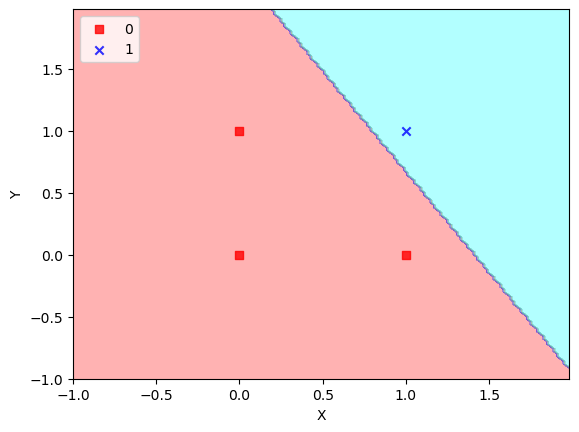

In [6]:
plot_decision_regions(X, y, classifier=nn)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

## La puerta OR

In [7]:
cols = ['x1', 'x2', 'OR']
puerta_or=[[0,0,0], [0,1,1], [1,0,1], [1,1,1]]
df = pd.DataFrame(puerta_or, columns=cols)
df.head()

,x1,x2,OR
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [8]:
X = df.values[:,0:2]
y = df.values[:,2]
nn = Perceptron(eta=0.01, n_iter=10)
nn.fit(X, y)
nn.w_

array([-0.00375655,  0.00388244,  0.00471828])

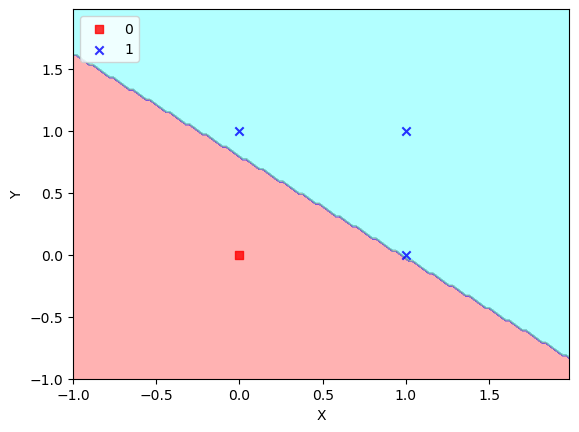

In [9]:
plot_decision_regions(X, y, classifier=nn)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

## ¿Y que ocurre con la puerta XOR?

In [10]:
cols = ['x1', 'x2', 'XOR']
puerta_xor=[[0,0,0], [1,0,1], [0,1,1], [1,1,0]]
df = pd.DataFrame(puerta_xor, columns=cols)
df.head()

,x1,x2,XOR
0,0,0,0
1,1,0,1
2,0,1,1
3,1,1,0


In [11]:
X = df.values[:,0:2]
y = df.values[:,2]
nn = Perceptron(eta=0.01, n_iter=50)
nn.fit(X, y)
nn.w_

array([ 0.00624345, -0.00611756, -0.01528172])

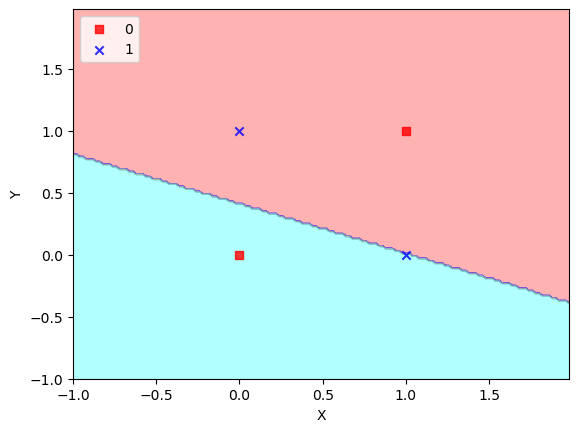

In [12]:
plot_decision_regions(X, y, classifier=nn)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.show()

__¡No consigue clasificar bien el conjunto, porque no es linealmente separable!__